In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gzip
import pickle


In [ ]:
def logit_transform(score):
    return np.log(score/(1-score))

def filter_df(df):
    df = df[df>= 0.5]
    return df 

In [86]:
df = pd.read_pickle("E:/run1_NuMI_CV_high_stats_score.pkl")
weight_PPFX=df.iloc[:,8]
weight_GENIE=df.iloc[:,9]
weight_Reint=df.iloc[:,10]
cv=df.iloc[:,13]

cv=logit_transform(cv)
PPFX=np.array(weight_PPFX)/1000
GENIE=np.array(weight_GENIE)/1000
Reint=np.array(weight_Reint)/1000
GENIE

array([array([2.090e-01, 3.110e-01, 3.300e-02, 1.849e+00, 3.600e-01, 3.720e-01,
              2.109e+00, 8.170e-01, 2.158e+00, 2.470e-01, 1.201e+00, 5.950e-01,
              4.320e-01, 6.250e-01, 4.440e-01, 2.477e+00, 2.487e+00, 3.600e-02,
              1.566e+00, 3.610e-01, 3.030e-01, 7.890e-01, 1.186e+00, 1.690e-01,
              8.100e-01, 1.160e-01, 7.150e-01, 1.600e-01, 9.040e-01, 2.490e-01,
              1.517e+00, 7.440e-01, 1.820e+00, 7.920e-01, 4.890e-01, 1.535e+00,
              6.600e-02, 5.710e-01, 4.900e-02, 6.290e-01, 8.850e-01, 7.220e-01,
              5.000e-02, 7.110e-01, 0.000e+00, 4.670e-01, 1.840e-01, 1.077e+00,
              1.106e+00, 9.010e-01, 2.670e-01, 1.210e-01, 1.192e+00, 1.676e+00,
              8.380e-01, 1.532e+00, 7.400e-02, 1.424e+00, 1.420e+00, 2.484e+00,
              2.239e+00, 9.310e-01, 3.850e-01, 6.920e-01, 3.030e-01, 9.800e-02,
              2.005e+00, 1.380e-01, 2.850e-01, 1.530e-01, 5.900e-02, 2.028e+00,
              1.216e+00, 9.850e-01, 1.34

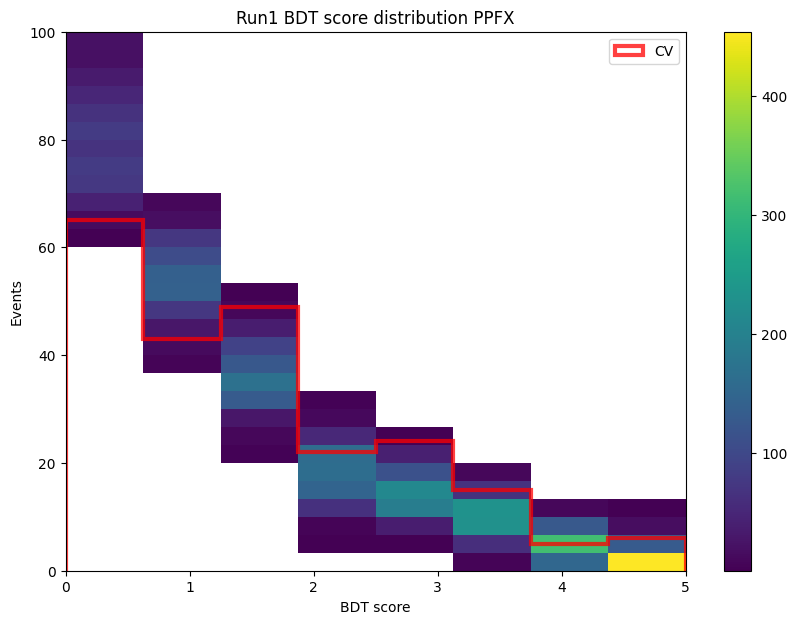

In [87]:
plt.figure(figsize=(10,7))
#plt.yscale('log')
plt.xlabel('BDT score')
plt.ylabel(r'Events')
plt.title('Run1 BDT score distribution PPFX')
(counts_std, bins_std) = np.histogram(cv, bins=np.linspace(0,5.,9))
i=0
x=[]
y=[]
while i < 600:
    weight=[]
    PPFX_w=[]
    for we in PPFX:
        weight.append(we[i])
    PPFX_w=(weight)
    w_PPFX = np.multiply(PPFX_w,cv)
    (counts_we, bins_we) = np.histogram(w_PPFX, bins=np.linspace(0,5.,9))
    x.append(bins_we[:-1])
    y.append(counts_we)
    i=i+1
x=np.array(x)
ana_x=x.flatten()
ana_x=ana_x.tolist()
y=np.array(y)
ana_y=y.flatten()
ana_y=ana_y.tolist()  
plt.hist2d(ana_x,ana_y,bins=(8,30),range=np.array(([(0., 5), (0., 100)])),cmin=0.000001)
plt.hist(bins_std[:-1], bins_std, weights=counts_std ,alpha=0.75, histtype='step',label='CV',color='r',lw=3)
cb = plt.colorbar()
plt.xlim(0.,5)
plt.ylim(0.,100.)
plt.legend()
plt.show()

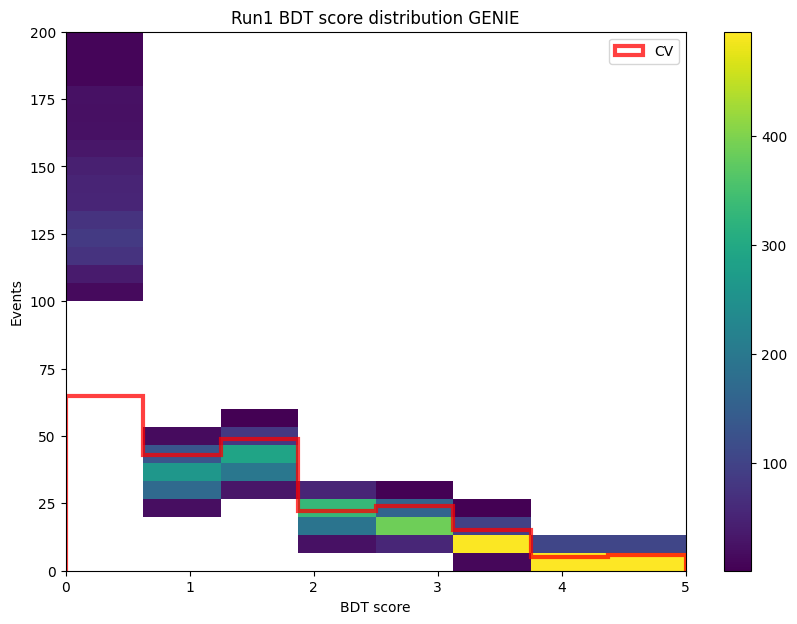

In [89]:
plt.figure(figsize=(10,7))
#plt.yscale('log')
plt.xlabel('BDT score')
plt.ylabel(r'Events')
plt.title('Run1 BDT score distribution GENIE')
(counts_std, bins_std) = np.histogram(cv, bins=np.linspace(0,5.,9))
i=0
x=[]
y=[]
while i < 600:
    weight=[]
    GENIE_w=[]
    for we in GENIE:
        weight.append(we[i])
    GENIE_w=(weight)
    w_GENIE = np.multiply(GENIE_w,cv)
    (counts_we, bins_we) = np.histogram(w_GENIE, bins=np.linspace(0,5.,9))
    x.append(bins_we[:-1])
    y.append(counts_we)
    i=i+1
x=np.array(x)
ana_x=x.flatten()
ana_x=ana_x.tolist()
y=np.array(y)
ana_y=y.flatten()
ana_y=ana_y.tolist()  
plt.hist2d(ana_x,ana_y,bins=(8,30),range=np.array(([(0., 5), (0., 200)])),cmin=0.000001)
plt.hist(bins_std[:-1], bins_std, weights=counts_std ,alpha=0.75, histtype='step',label='CV',color='r',lw=3)
cb = plt.colorbar()
plt.xlim(0.,5)
#plt.ylim(0.,200.)
plt.legend()
plt.show()

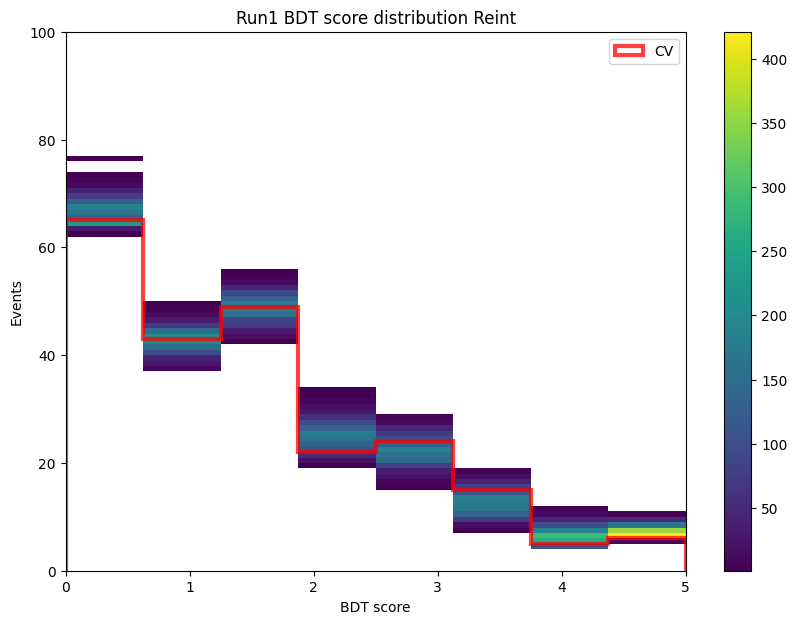

In [82]:
plt.figure(figsize=(10,7))
#plt.yscale('log')
plt.xlabel('BDT score')
plt.ylabel(r'Events')
plt.title('Run1 BDT score distribution Reint')
(counts_std, bins_std) = np.histogram(cv, bins=np.linspace(0,5.,9))
i=0
x=[]
y=[]
while i < 1000:
    weight=[]
    Reint_w=[]
    for we in Reint:
        weight.append(we[i])
    Reint_w=(weight)
    w_Reint = np.multiply(Reint_w,cv)
    (counts_we, bins_we) = np.histogram(w_Reint, bins=np.linspace(0,5.,9))
    x.append(bins_we[:-1])
    y.append(counts_we)
    i=i+1
x=np.array(x)
ana_x=x.flatten()
ana_x=ana_x.tolist()
y=np.array(y)
ana_y=y.flatten()
ana_y=ana_y.tolist()  
plt.hist2d(ana_x,ana_y,bins=(8,100),range=np.array(([(0., 5), (0., 100)])),cmin=0.000001)
plt.hist(bins_std[:-1], bins_std, weights=counts_std ,alpha=0.75, histtype='step',label='CV',color='r',lw=3)
cb = plt.colorbar()
plt.xlim(0.,5)
plt.ylim(0.,100.)
plt.legend()
plt.show()